## 03_02 Preparing Text for Clustering

In [2]:
import pandas as pd

#Load course hashtags

hashtags_df = pd.read_csv("/content/Course-Hashtags.csv")
print("\nSample hashtag data: ")
print(hashtags_df[:2])

#Separate Hashtags and titles to lists
hash_list = hashtags_df["HashTags"].tolist()
title_list = hashtags_df["Course"].tolist()

#DO TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
hash_matrix = vectorizer.fit_transform(hash_list)
print("/n Feature names Identified : \n")

print(vectorizer.get_feature_names())



Sample hashtag data: 
                            Course                             HashTags
0  Apache Spark Essential Training  BigData,DataScience,MachineLearning
1           Java Memory Management            Java,Advanced,Programming
/n Feature names Identified : 

['advanced', 'automation', 'bigdata', 'datascience', 'design', 'developer', 'gcp', 'graphics', 'hadoop', 'ide', 'intermediate', 'java', 'jdbc', 'kubernetes', 'machinelearning', 'patterns', 'programming', 'python', 'scala', 'scripting']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 03_03 Clustering TF-IDF data

In [6]:
# Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

# Split the data into three clusters 
kmeans = KMeans(n_clusters =3 ).fit(hash_matrix)

# get Cluster lables
clusters = kmeans.labels_

#Print cluster label and Courses under each cluster
for group in set(clusters):
  print("\nGroup: ", group, "\n***************")

  for i in hashtags_df.index:
    if( clusters[i] == group):
      print(title_list[i])


Group:  0 
***************
Apache Spark Essential Training
Machine Learning and AI Foundations
Hadoop for Data Science
Data Science on Google Cloud Platform
Scala for Data Science

Group:  1 
***************
Java Memory Management
Java : Database Integration and JDBC
R Programming
Java IDE Overview
Kubernetes for Java Developers

Group:  2 
***************
Python Automation and Testing
Python for Graphics
Python Design Patterns
Python Scripting


## 03_04 Finding optimal Cluster size

Sum of squared distances :  [11.433022387031057, 9.055813116540266, 6.761066172191217, 5.825459420623091, 4.688883377604404, 3.877655335798853, 3.3481406712109574, 3.009148147676421, 2.2891113420351643, 1.8077797890512946, 1.540401015180819, 0.8457910455266844, 0.40164181287464085, 0.0]


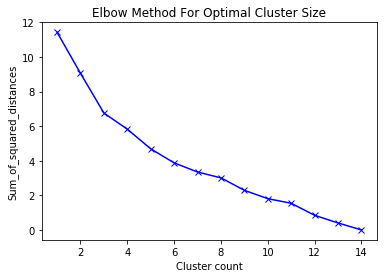

In [ ]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()


Sum of squared distances:  [11.433022387031059, 9.055813116540266, 6.761066172191217, 5.6283212260073165, 4.688883377604405, 4.039404310143011, 3.348140671210957, 2.8186260066230613, 2.289111342035165, 1.807779789051295, 1.3264482360674248, 0.8457910455266846, 0.40164181287464107, 2.220446049250313e-16]


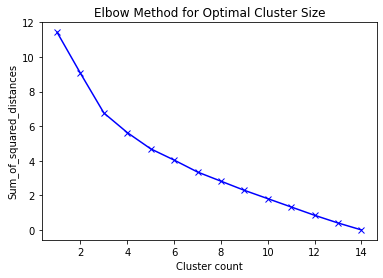

In [7]:
# Find optimal cluster size by finding sum-of-squared distances

sosd = []
#Run clustering for sizes between 1 and 15 and capture inertia 
K = range(1,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(hash_matrix)
  sosd.append(km.inertia_)

print("Sum of squared distances: ", sosd)


#Plot sosd against number of clusters
import matplotlib.pyplot as plt
plt.plot(K, sosd, 'bx-')
plt.xlabel('Cluster count')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal Cluster Size')
plt.show()